# Import Data and Libraries

In [12]:
from google.colab import drive

# This will prompt you to log in to your Google account to authorize access to Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [3]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import for mlflow
import mlflow
import mlflow.sklearn
import subprocess

from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, make_scorer, fbeta_score
from tqdm import tqdm  # Import tqdm
from joblib import Parallel, delayed
import multiprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from imblearn.pipeline import Pipeline as ImbPipeline
import multiprocessing
from tqdm import tqdm
import pickle
import joblib
from joblib import load

In [13]:
# Training data
app_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 7/Output/app_train_imp.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 95)


,EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2^2,EXT_SOURCE_2^2 DAYS_BIRTH,...,DAYS_ID_PUBLISH,CODE_GENDER_M,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED_PERCENT,DAYS_EMPLOYED,SK_ID_CURR,TARGET
0,0.036649,346.733022,0.009637,0.005108,0.262949,2487.756636,0.139376,1318.634256,0.069142,654.152107,...,-2120.0,1.0,-1134.0,1.0,2.0,2.0,-0.067329,-637.0,100002.0,1
1,0.333073,5583.975307,0.207254,0.178286,0.622246,10431.950422,0.535276,8973.906339,0.387190,6491.237078,...,-291.0,0.0,-828.0,0.0,1.0,1.0,-0.070862,-1188.0,100003.0,0
2,0.405575,7724.580288,0.225464,0.295894,0.555912,10587.901540,0.729567,13895.327191,0.309038,5885.942404,...,-2531.0,1.0,-815.0,1.0,2.0,2.0,-0.011814,-225.0,100004.0,0
3,0.348166,6616.894625,0.226462,0.186365,0.650442,12361.644326,0.535276,10172.925140,0.423074,8040.528832,...,-2437.0,0.0,-617.0,1.0,2.0,2.0,-0.159905,-3039.0,100006.0,0
4,0.172754,3443.335521,0.055754,0.092471,0.322738,6432.819536,0.535276,10669.126224,0.104160,2076.117157,...,-3458.0,1.0,-1106.0,1.0,2.0,2.0,-0.152418,-3038.0,100007.0,0


In [14]:
app_train = app_train.set_index("SK_ID_CURR")

In [15]:
app_train

,EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2^2,EXT_SOURCE_2^2 DAYS_BIRTH,...,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,CODE_GENDER_M,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED_PERCENT,DAYS_EMPLOYED,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002.0,0.036649,346.733022,0.009637,0.005108,0.262949,2487.756636,0.139376,1318.634256,0.069142,654.152107,...,0.0,-2120.0,1.0,-1134.0,1.0,2.0,2.0,-0.067329,-637.0,1
100003.0,0.333073,5583.975307,0.207254,0.178286,0.622246,10431.950422,0.535276,8973.906339,0.387190,6491.237078,...,0.0,-291.0,0.0,-828.0,0.0,1.0,1.0,-0.070862,-1188.0,0
100004.0,0.405575,7724.580288,0.225464,0.295894,0.555912,10587.901540,0.729567,13895.327191,0.309038,5885.942404,...,0.0,-2531.0,1.0,-815.0,1.0,2.0,2.0,-0.011814,-225.0,0
100006.0,0.348166,6616.894625,0.226462,0.186365,0.650442,12361.644326,0.535276,10172.925140,0.423074,8040.528832,...,0.0,-2437.0,0.0,-617.0,1.0,2.0,2.0,-0.159905,-3039.0,0
100007.0,0.172754,3443.335521,0.055754,0.092471,0.322738,6432.819536,0.535276,10669.126224,0.104160,2076.117157,...,1.0,-3458.0,1.0,-1106.0,1.0,2.0,2.0,-0.152418,-3038.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251.0,0.364862,3403.064320,0.248701,0.195302,0.681632,6357.585111,0.535276,4992.521588,0.464623,4333.535804,...,0.0,-1982.0,1.0,-273.0,1.0,1.0,1.0,-0.025303,-236.0,0
456252.0,0.062088,1289.874083,0.007202,0.033234,0.115992,2409.735313,0.535276,11120.364104,0.013454,279.510194,...,0.0,-4090.0,0.0,0.0,0.0,2.0,2.0,-0.118733,-1648.0,0
456253.0,0.117248,1754.727146,0.062812,0.025661,0.535722,8017.611736,0.218859,3275.445025,0.286998,4295.209004,...,1.0,-5150.0,0.0,-1909.0,1.0,3.0,3.0,-0.529266,-7921.0,0


In [7]:
app_train["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

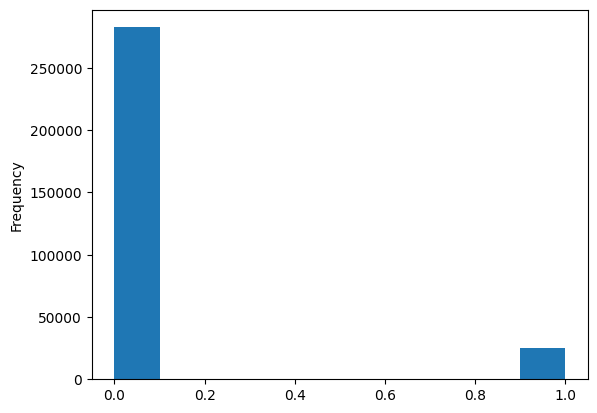

In [8]:
app_train['TARGET'].astype(int).plot.hist();

In [16]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [17]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 94 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [18]:
# Clean and preprocess feature names
def clean_feature_names(df):
    df.columns = df.columns.str.strip()  # Remove leading/trailing whitespaces
    df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)  # Remove non-alphanumeric and non-underscore characters
    df.columns = df.columns.str.lower()  # Convert names to lowercase

In [19]:
X = app_train.drop(columns=['TARGET'])  # Features
y = app_train['TARGET']

In [20]:
# Clean the column names of X
clean_feature_names(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
y_test.head(50)

SK_ID_CURR
384575.0    0
214010.0    0
142232.0    0
389171.0    0
283617.0    0
362171.0    0
180689.0    0
310328.0    0
233043.0    0
232220.0    0
134561.0    1
120952.0    1
188909.0    0
347275.0    0
250804.0    0
348749.0    0
231383.0    0
119647.0    0
257374.0    0
305211.0    0
153812.0    0
149325.0    0
404667.0    0
114238.0    0
373414.0    1
188388.0    0
231929.0    1
288831.0    0
111556.0    0
199643.0    0
120657.0    0
439579.0    0
361223.0    0
345983.0    0
284103.0    0
280677.0    0
378518.0    0
425522.0    0
390314.0    0
160738.0    0
389904.0    1
123258.0    0
152796.0    0
134391.0    0
349402.0    0
196937.0    0
292484.0    0
160044.0    0
138523.0    0
209865.0    0
Name: TARGET, dtype: int64

In [22]:
X_test.head(50).to_csv("/content/drive/MyDrive/Colab Notebooks/Projet 7/API/X_test50_withIndex.csv")

# Test with data non improved

In [18]:
# Define the parameter grid for LightGBM hyperparameter tuning - derive de XGBoost mais plus rapide
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [6, 8, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__min_child_samples': [20, 30, 40]
}

In [19]:
lgb_classifier = lgb.LGBMClassifier(random_state=42, class_weight={0: 1, 1: 2})

In [20]:
pipeline = ImbPipeline([
    ('classifier', lgb_classifier)
])


In [21]:
num_cores = multiprocessing.cpu_count() # regarder le nbre de processeur, cmpter le nbre de cpu
num_cores

2

In [22]:
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid, n_iter=10, scoring=accuracy_score, refit=True, cv=5, verbose=1, random_state=42, n_jobs=num_cores
)

In [23]:
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Evaluate the best estimator on the test data
y_pred = best_estimator.predict(X_test)

# Evaluate the best estimator on the test data
y_pred_prob = best_estimator.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate scores on the test data
#roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Best Parameters:", best_params)

# Calculate and log evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy score: ", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.120870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7677
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149509 -> initscore=-1.738459
[LightGBM] [Info] Start training from score -1.738459
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_l

In [24]:
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56554
           1       0.41      0.11      0.17      4949

    accuracy                           0.92     61503
   macro avg       0.67      0.55      0.56     61503
weighted avg       0.88      0.92      0.89     61503



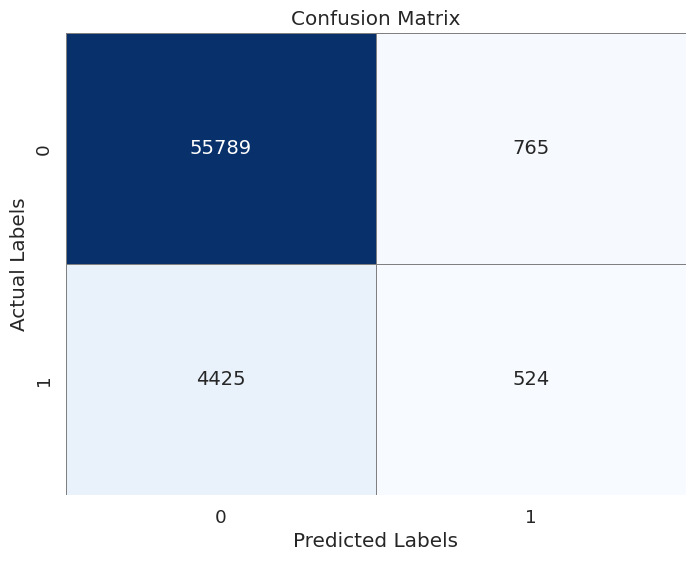

In [25]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a Seaborn heatmap for visualization
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with the numeric values
    fmt="d",     # Format annot values as integers
    cmap="Blues",  # Colormap for the heatmap
    cbar=False,   # Hide color bar
    annot_kws={"size": 14},  # Adjust annotation font size
    linewidths=0.5,  # Add line between cells
    linecolor="gray"  # Line color between cells
)

# Set axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

# Enhancement of the data set


In [23]:
# Calculate the desired number of samples for each class to get total class 0 twice as total class 1
desired_samples_class_0 = np.sum(y_train == 1) * 2
desired_samples_class_1 = np.sum(y_train == 1)

# Create a custom sampling strategy dictionary for RandomUnderSampler
sampling_strategy_under = {
    0: desired_samples_class_0,
    1: desired_samples_class_1
}


In [24]:
random_undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=42)

In [25]:
X_train_resampled, y_train_resampled = random_undersampler.fit_resample(X_train, y_train)

In [26]:
# Visualisation des differentes classes de la target
# Comptage des classes dans le vecteur target

def visu_y(df, df_name):
  df_class_counts = df.value_counts()

  # Création du diagramme à barres pour y_train
  plt.figure(figsize=(3, 5))
  sns.barplot(x=df_class_counts.index, y=df_class_counts.values, palette='viridis')
  plt.title(f"Répartition des classes \n dans {df_name}")
  plt.xlabel('Classes')
  plt.ylabel('Nombre d\'échantillons')
  plt.show()


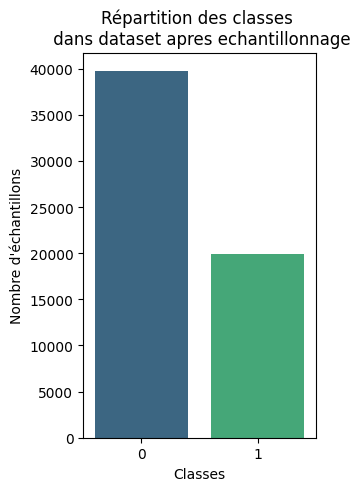

In [27]:
visu_y(y_train_resampled, 'dataset apres echantillonnage')

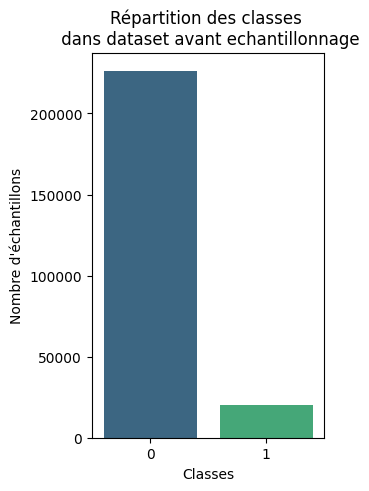

In [28]:
visu_y(y_train, 'dataset avant echantillonnage')

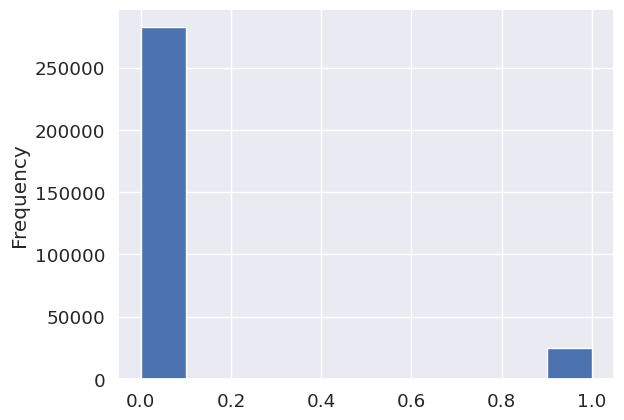

In [32]:
app_train['TARGET'].astype(int).plot.hist();

In [30]:
# Oversampling synthetique afin de surechantillonner la classe 1
smote = SMOTE(sampling_strategy=0.7, random_state=42)


# Training of 3 models on the improved data

Training LogisticRegression:   0%|          | 0/1 [00:00<?, ?model/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters (LogisticRegression): {'classifier__solver': 'newton-cg', 'classifier__penalty': 'l2', 'classifier__C': 0.1}
ROC AUC on Test Data (LogisticRegression): 0.7105568105636934


Training LogisticRegression: 100%|██████████| 1/1 [02:21<00:00, 141.44s/model]

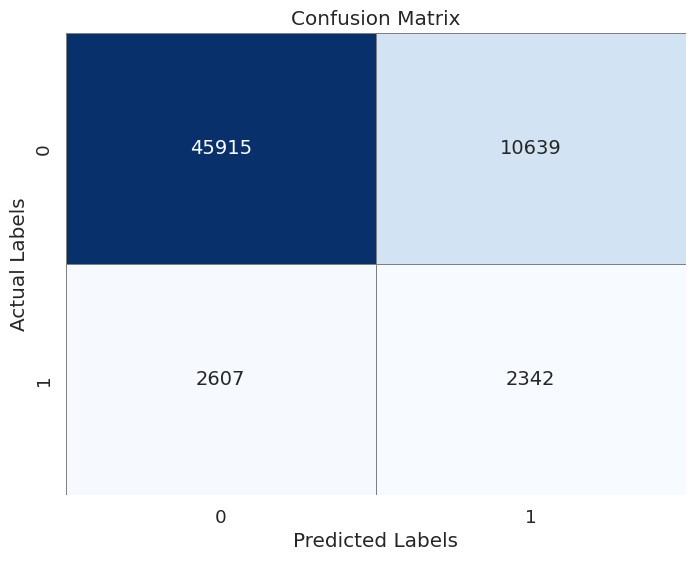

Training LogisticRegression: 100%|██████████| 1/1 [02:21<00:00, 141.78s/model]


              precision    recall  f1-score   support

           0       0.95      0.81      0.87     56554
           1       0.18      0.47      0.26      4949

    accuracy                           0.78     61503
   macro avg       0.56      0.64      0.57     61503
weighted avg       0.88      0.78      0.82     61503



Training LGBMClassifier:   0%|          | 0/1 [00:00<?, ?model/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 27826, number of negative: 39752
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22206
[LightGBM] [Info] Number of data points in the train set: 67578, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.583330 -> initscore=0.336458
[LightGBM] [Info] Start training from score 0.336458
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't 

2024/07/16 16:51:07 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp345gmcgy/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.2.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 
Training LGBMClassifier: 100%|██████████| 1/1 [00:53<00:00, 53.59s/model]

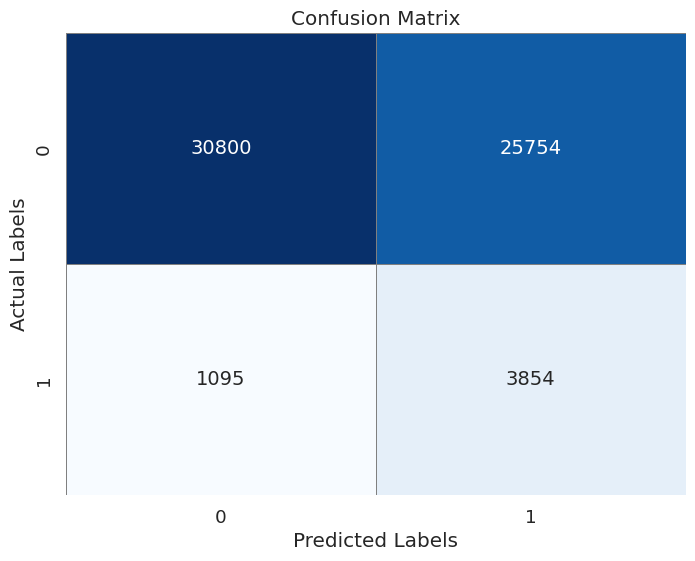

Training LGBMClassifier: 100%|██████████| 1/1 [00:53<00:00, 53.91s/model]


              precision    recall  f1-score   support

           0       0.97      0.54      0.70     56554
           1       0.13      0.78      0.22      4949

    accuracy                           0.56     61503
   macro avg       0.55      0.66      0.46     61503
weighted avg       0.90      0.56      0.66     61503



Training RandomForestClassifier:   0%|          | 0/1 [00:00<?, ?model/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters (RandomForestClassifier): {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 6, 'classifier__bootstrap': False}
ROC AUC on Test Data (RandomForestClassifier): 0.7320153845919686


Training RandomForestClassifier: 100%|██████████| 1/1 [04:03<00:00, 243.44s/model]

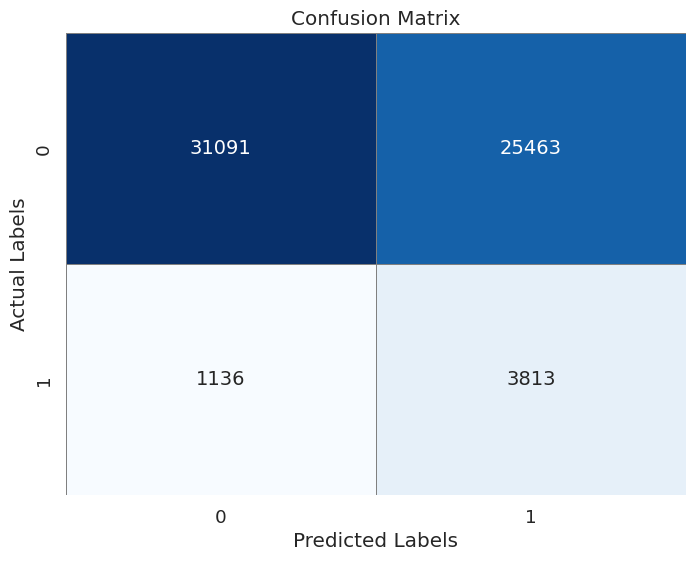

Training RandomForestClassifier: 100%|██████████| 1/1 [04:03<00:00, 243.98s/model]

              precision    recall  f1-score   support

           0       0.96      0.55      0.70     56554
           1       0.13      0.77      0.22      4949

    accuracy                           0.57     61503
   macro avg       0.55      0.66      0.46     61503
weighted avg       0.90      0.57      0.66     61503

Best model: LGBMClassifier
Best fbeta_score: 0.39004938871346445


In [31]:
# Définir les classifieurs et leurs grilles de recherche d'hyperparamètres dans un dictionnaire
classifiers = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),  #class_weight={0: 1, 1: 2}
        'param_grid': {
            'classifier__C': [0.1], #[0.1, 1.0, 10.0],  # Paramètre de régularisation
            'classifier__solver': ['newton-cg'], #['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # Solvers à utiliser
            'classifier__penalty': ['l2'] #['l1', 'l2', 'elasticnet', 'none']
        }

 },
    'LGBMClassifier': {
        'model': LGBMClassifier(random_state=42, class_weight={0: 1, 1: 2}), # class_weight permet de poser plus d'attention a la classe 1 que 0
        'param_grid': {
            'classifier__n_estimators': [100], #[100, 200, 300],
            'classifier__max_depth': [10], #[6, 8, 10],
            'classifier__learning_rate': [0.01], #[0.01, 0.1, 0.2],
            'classifier__subsample': [0.8], #[0.8, 0.9, 1.0],
            'classifier__colsample_bytree': [0.8], #[0.8, 0.9, 1.0],
            'classifier__min_child_samples': [40] #[20, 30, 40]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 2}),
        'param_grid': {
            'classifier__n_estimators': [200], #[100, 200, 300],
            'classifier__max_depth': [6], #[6, 8, 10],
            'classifier__min_samples_split': [5], #[5, 10, 12],
            'classifier__min_samples_leaf': [4], #[1, 2, 4],
            'classifier__bootstrap': [False] #[True, False]
        }
    }
}


# Définir la métrique de score
scoring = make_scorer(fbeta_score, beta=2) # beta > 1 permet de mettre plus de poids sur le recall

# Définir le nombre de cœurs à utiliser pour la recherche
num_cores = multiprocessing.cpu_count()

best_fbeta = 0

# Boucle pour tester chaque classifieur dans le même MLflow
for clf_name, clf_info in classifiers.items():
    clf_model = clf_info['model']
    param_grid = clf_info['param_grid']

    pipeline = ImbPipeline([
         ('oversampler', smote),
        ('classifier', clf_model)
    ])

    random_search = RandomizedSearchCV(
        pipeline, param_distributions=param_grid, n_iter=10, scoring=scoring, refit=True, cv=5, verbose=1, random_state=42, n_jobs=num_cores
    )

    with mlflow.start_run():
        with tqdm(desc=f"Training {clf_name}", total=1, unit="model") as progress_bar:
            progress_bar.set_postfix_str("")

            # Entraîner le modèle en utilisant RandomizedSearchCV
            random_search.fit(X_train_resampled, y_train_resampled)

            # Obtenir les meilleurs paramètres et le meilleur estimateur
            best_params = random_search.best_params_
            best_estimator = random_search.best_estimator_

            # Évaluer le meilleur estimateur sur les données de test
            y_pred = best_estimator.predict(X_test)

            # Évaluer le meilleur estimateur sur les données de test
            y_pred_prob = best_estimator.predict_proba(X_test)[:, 1]  # Prédire les probabilités pour la classe 1

            # Calculer l'aire sous la courbe ROC (ROC AUC) sur les données de test
            roc_auc = roc_auc_score(y_test, y_pred_prob)
            print(f"Best Parameters ({clf_name}):", best_params)
            print(f"ROC AUC on Test Data ({clf_name}):", roc_auc)

            # Calculer et enregistrer les métriques d'évaluation
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            fbeta = fbeta_score(y_test, y_pred, beta=2)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)

            mlflow.log_param("Model name", clf_name)
            mlflow.log_params(best_params)
            mlflow.log_metrics({
                "accuracy": accuracy,
                "f1_score": f1,
                "fbeta_score": fbeta,
                "precision": precision,
                "recall": recall,
                "roc_auc": roc_auc,
            })

            # Enregistrer le modèle entraîné
            mlflow.sklearn.log_model(best_estimator, f"{clf_name}_model")

            # Si le modèle actuel a une meilleure performance fbeta_score que le meilleur modèle enregistré jusqu'à présent, le mettre à jour
            if fbeta > best_fbeta:
                best_fbeta = fbeta
                best_model_name = clf_name
                best_model = best_estimator

            progress_bar.update(1)

            # Compute the confusion matrix
            cm = confusion_matrix(y_test, y_pred)

            # Create a Seaborn heatmap for visualization
            plt.figure(figsize=(8, 6))
            sns.set(font_scale=1.2)  # Adjust font size if needed
            sns.heatmap(
            cm,
            annot=True,  # Annotate cells with the numeric values
            fmt="d",     # Format annot values as integers
            cmap="Blues",  # Colormap for the heatmap
            cbar=False,   # Hide color bar
            annot_kws={"size": 14},  # Adjust annotation font size
            linewidths=0.5,  # Add line between cells
            linecolor="gray"  # Line color between cells
            )

            # Set axis labels and title
            plt.xlabel("Predicted Labels")
            plt.ylabel("Actual Labels")
            plt.title("Confusion Matrix")

            # Show the plot
            plt.show()

            # Generate the classification report
            report = classification_report(y_test, y_pred)

            # Print the report
            print(report)

    # Arrêter l'exécution MLflow
    mlflow.end_run()

# meilleur modèle enregistré dans best_model
print("Best model:", best_model_name)
print("Best fbeta_score:", best_fbeta)

# Sauver le meilleur modèle
with open('/content/drive/MyDrive/Colab Notebooks/Projet 7/API/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [32]:
# Sauver le meilleur modèle avec joblib
joblib.dump(best_model, '/content/drive/MyDrive/Colab Notebooks/Projet 7/API/best_model_withIndex.joblib')

['/content/drive/MyDrive/Colab Notebooks/Projet 7/API/best_model_withIndex.joblib']

In [33]:
from joblib import load

# Charger le modèle depuis le fichier Joblib
loaded_model = load('/content/drive/MyDrive/Colab Notebooks/Projet 7/API/best_model_withIndex.joblib')


In [34]:
model_best_LGBM = loaded_model['classifier']

In [35]:
from joblib import dump

# Sauvegarder uniquement le modèle model_best_LGBM
dump(model_best_LGBM, '/content/drive/MyDrive/Colab Notebooks/Projet 7/API/model_best_LGBM.sav')


['/content/drive/MyDrive/Colab Notebooks/Projet 7/API/model_best_LGBM.sav']

In [36]:
model_best_LGBM2 = load('/content/drive/MyDrive/Colab Notebooks/Projet 7/API/model_best_LGBM.sav')

In [37]:
y_pred = model_best_LGBM2.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [38]:
y_pred_proba = model_best_LGBM2.predict_proba(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [39]:
df_proba = pd.DataFrame(y_pred_proba)

In [40]:
df = pd.DataFrame(y_pred)

In [41]:
df_proba

,0,1
0,0.271646,0.728354
1,0.589674,0.410326
2,0.356613,0.643387
3,0.641408,0.358592
4,0.467722,0.532278
...,...,...
61498,0.410183,0.589817
61499,0.306749,0.693251
61500,0.609936,0.390064
61501,0.518155,0.481845


In [ ]:
X_test.index

In [46]:
df.head(50)

,0
0,1
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,0


In [42]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.54      0.70     56554
           1       0.13      0.78      0.22      4949

    accuracy                           0.56     61503
   macro avg       0.55      0.66      0.46     61503
weighted avg       0.90      0.56      0.66     61503



In [44]:
import os

# Obtenir le répertoire de travail actuel
current_directory = os.getcwd()

# Afficher le chemin complet vers le fichier "best_model.pkl"
print("Chemin vers best_model.pkl :", os.path.join(current_directory, "best_model.pkl"))


Chemin vers best_model.pkl : /content/best_model.pkl


In [51]:
import joblib

# save model with joblib
filename = '/content/drive/MyDrive/Colab Notebooks/Projet 7/joblib_best_model.sav'
joblib.dump(best_model, filename)

['/content/drive/MyDrive/Colab Notebooks/Projet 7/joblib_best_model.sav']

In [45]:
pip install pyngrok #

In [46]:
from pyngrok import ngrok

In [47]:
! ngrok authtoken 2dRe845AQz5pdEjTrcp3dcrtNtI_5mZ1dhbJBG2pEVUhaQasp # Mon authtoken ngrok ici

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [48]:
from pyngrok import ngrok
from getpass import getpass

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
#NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
ngrok.set_auth_token('2dRe845AQz5pdEjTrcp3dcrtNtI_5mZ1dhbJBG2pEVUhaQasp')

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url) # indique l'url qu'il faut consulter

MLflow Tracking UI: https://c83a-35-227-39-77.ngrok-free.app


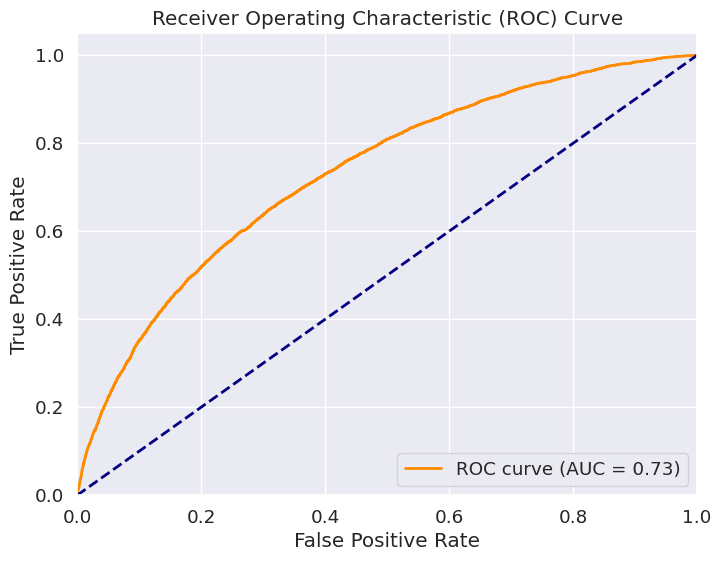

In [49]:
from sklearn.metrics import roc_curve

# Assuming you have 'y_test' (actual labels) and 'y_pred_prob' (predicted probabilities) defined

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [50]:
# Création du DataFrame à partir des vecteurs y_pred, y_pred_proba et y_test
dataf = pd.DataFrame({
    #'index': X_test.index,
    'y_pred': y_pred,
    'y_pred_proba_class_0': [proba[0] for proba in y_pred_proba],
    'y_pred_proba_class_1': [proba[1] for proba in y_pred_proba],
    'y_true': y_test
})

dataf

,y_pred,y_pred_proba_class_0,y_pred_proba_class_1,y_true
SK_ID_CURR,,,,
384575.0,1,0.271646,0.728354,0
214010.0,0,0.589674,0.410326,0
142232.0,1,0.356613,0.643387,0
389171.0,0,0.641408,0.358592,0
283617.0,1,0.467722,0.532278,0
...,...,...,...,...
396891.0,1,0.410183,0.589817,0
423085.0,1,0.306749,0.693251,0
356971.0,0,0.609936,0.390064,0


In [51]:
# Initialiser un dictionnaire pour stocker les prédictions pour différents seuils
predictions = {}

# Tester différents seuils de 0.1 à 0.9
for threshold in np.arange(0, 1.1, 0.1):
    # Appliquer le seuil pour obtenir les prédictions binaires
    y_pred_range = (dataf["y_pred_proba_class_1"] >= threshold).astype(int)
    predictions[threshold] = y_pred_range

# Afficher les prédictions pour chaque seuil
for threshold, y_pred_range in predictions.items():
    print(f"Threshold: {threshold:.1f}, Predictions: {y_pred_range}")

# Initialiser un dictionnaire pour stocker les résultats pour différents seuils
results = {}

# Tester différents seuils de 0 à 1
for threshold in np.arange(0, 1.1, 0.1):
    # Appliquer le seuil pour obtenir les prédictions binaires
    y_pred_range = (dataf["y_pred_proba_class_1"] >= threshold).astype(int)

    # Calculer les résultats selon la logique définie
    score = 0
    for y_true, y_pred in zip(dataf["y_true"], y_pred_range):
        if y_true == 0 and y_pred == 0:
            score += 1
        elif y_true == 0 and y_pred == 1:
            score += -1
        elif y_true == 1 and y_pred == 1:
            score += 0
        elif y_true == 1 and y_pred == 0:
            score += -10  # comme indique dans l'enonce du projet

    # Stocker le score pour le seuil actuel
    results[threshold] = score

print(results)


Threshold: 0.0, Predictions: SK_ID_CURR
384575.0    1
214010.0    1
142232.0    1
389171.0    1
283617.0    1
           ..
396891.0    1
423085.0    1
356971.0    1
320581.0    1
392758.0    1
Name: y_pred_proba_class_1, Length: 61503, dtype: int64
Threshold: 0.1, Predictions: SK_ID_CURR
384575.0    1
214010.0    1
142232.0    1
389171.0    1
283617.0    1
           ..
396891.0    1
423085.0    1
356971.0    1
320581.0    1
392758.0    1
Name: y_pred_proba_class_1, Length: 61503, dtype: int64
Threshold: 0.2, Predictions: SK_ID_CURR
384575.0    1
214010.0    1
142232.0    1
389171.0    1
283617.0    1
           ..
396891.0    1
423085.0    1
356971.0    1
320581.0    1
392758.0    1
Name: y_pred_proba_class_1, Length: 61503, dtype: int64
Threshold: 0.3, Predictions: SK_ID_CURR
384575.0    1
214010.0    1
142232.0    1
389171.0    1
283617.0    1
           ..
396891.0    1
423085.0    1
356971.0    1
320581.0    1
392758.0    1
Name: y_pred_proba_class_1, Length: 61503, dtype: int64


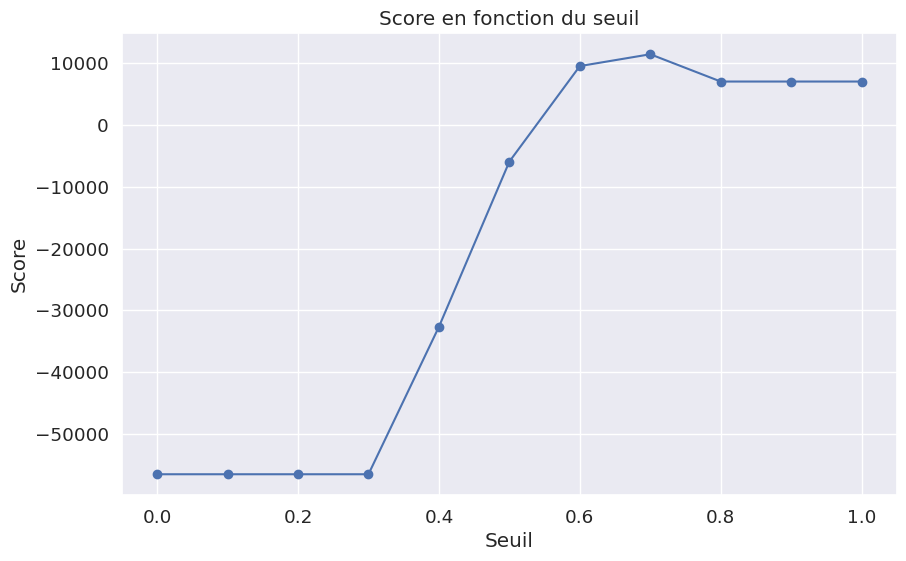

In [52]:
# Extraire les seuils et les scores pour le graphique
thresholds = list(results.keys())
scores = list(results.values())

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(thresholds, scores, marker='o', linestyle='-')
plt.title('Score en fonction du seuil')
plt.xlabel('Seuil')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [ ]:
!mlflow ui --port 5000  # Rend disponible le port 5000 pour ouvrir le "tunnel" (se met a l'ecoute du port 5000) donc tourne a l'infini.... Oblige car on est sur un server distant en etant sur Collab.

[2024-07-16 17:09:43 +0000] [21617] [INFO] Starting gunicorn 22.0.0
[2024-07-16 17:09:43 +0000] [21617] [INFO] Listening at: http://127.0.0.1:5000 (21617)
[2024-07-16 17:09:43 +0000] [21617] [INFO] Using worker: sync
[2024-07-16 17:09:43 +0000] [21618] [INFO] Booting worker with pid: 21618
[2024-07-16 17:09:43 +0000] [21619] [INFO] Booting worker with pid: 21619
[2024-07-16 17:09:43 +0000] [21620] [INFO] Booting worker with pid: 21620
[2024-07-16 17:09:43 +0000] [21621] [INFO] Booting worker with pid: 21621
